# 02. EDA, Exploratory Data Analysis

* EDA(탐색적 데이터 분석)이란, 요약 및 시각화 등을 통해 데이터를 이해하는 과정을 말한다.

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from review_analyzer import *

# rc('font', family='AppleGothic') # Mac 
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [7]:
data_path = "data/naver_review_preprocessing.csv"
data = pd.read_csv(data_path, parse_dates=["date"], encoding="CP949")
data.head(5)

,reviewer,review,date,weekday
0,shooooooo,종류도 알차게 많고 다 맛있어요,2024-06-07,금요일
1,쥴리08,커피랑 브런치크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피...,2024-05-23,목요일
2,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,2024-05-19,일요일
3,DEAN KIL,비싸지만 좋은곳,2024-05-04,토요일
4,이진욱쨩,항상 친절하시고 음식도맛있네요,2024-04-21,일요일


## 1. 재방문에 대한 분석

- 의견이 크게 반전으로 달라지는 의견은 없었다. 
- 재방문을 한 사람이 많이 않아서 일반화 하기에는 어려움이 있다.

In [8]:
revisitor_data = data["reviewer"].value_counts()
revisitor = revisitor_data[revisitor_data > 1].index
revisited_data = data.loc[data["reviewer"].isin(revisitor),:].sort_values(by=["reviewer"])
print(revisited_data.shape)
revisited_data

(14, 4)


,reviewer,review,date,weekday
20,ERANGMAM,애기가 스테이크 너무 잘먹었어요 언제나 더파크뷰는 흠이없어요 친절함과 식사의 품질은...,2024-01-03,수요일
192,ERANGMAM,특별한날 방문하기 너무 좋아요 음식도 항상 신선하고 맛있고 무엇보다 직원들 너무 친...,2022-02-05,토요일
302,noeulll,디너만 자주 가다가 브런치 오랜만에 갓는데 예전만 못하지만 괜찮네요,2020-06-17,수요일
303,noeulll,정말 완벽한 서비스입니다 근데 맛이 예전만 못하네요 그래도 만족합니다,2020-05-27,수요일
19,나라나57,너무 맛있고 분위기 좋습니다,2024-01-05,금요일
40,나라나57,다음에 또갈거에요,2023-10-28,토요일
157,오예3337,넘 맛있어요 기념일에 꼭 강추,2022-06-03,금요일
158,오예3337,서비스가 너무 좋아요 굿굿,2022-06-03,금요일
4,이진욱쨩,항상 친절하시고 음식도맛있네요,2024-04-21,일요일
30,이진욱쨩,너무친절 음식도 너무맛있어욤 역시 신라호텔 체고,2023-11-19,일요일


## 2. 시기별 리뷰 분석

* 22년에 리뷰 활동이 가장 활발했으며 23년에 줄어듦

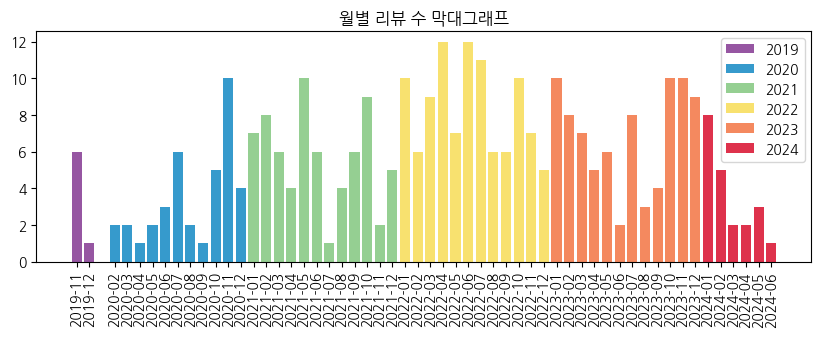

In [9]:
# 월별 리뷰 수 파악하기
palette = {"2019": "#9656a2", "2020": "#369acc", "2021": "#95cf92", "2022": "#f8e16f", "2023": "#f4895f", "2024": "#de324c"}
draw_barplot_by_period(data, "M", palette=palette)

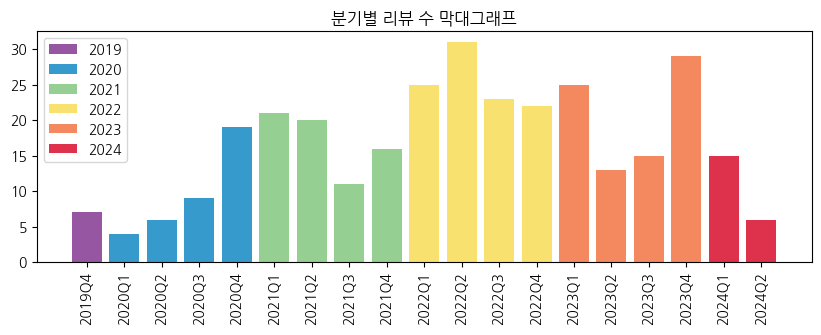

In [10]:
# 분기별 리뷰 수 파악하기
draw_barplot_by_period(data, "Q", palette=palette)

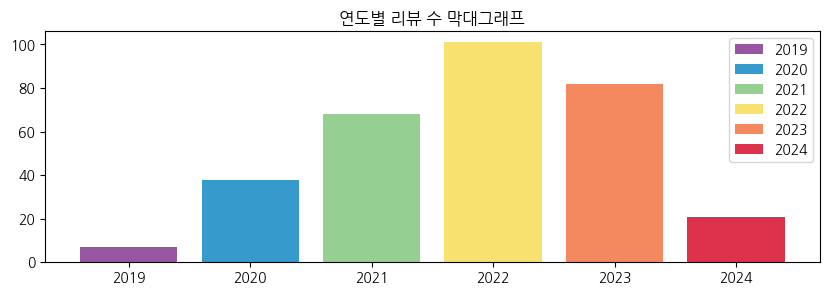

In [11]:
# 연도별 리뷰 수 파악하기
draw_barplot_by_period(data, "Y", rot=0, palette=palette)

## 3. 요일별 리뷰 분석

* 예상한대로 금, 토, 일에 가장 활발이 방문이 이루어진 것으로 보인다.

In [12]:
weekday_data = data["weekday"].value_counts()
weekday_data

weekday
토요일    80
일요일    75
금요일    46
목요일    38
수요일    29
월요일    29
화요일    20
Name: count, dtype: int64

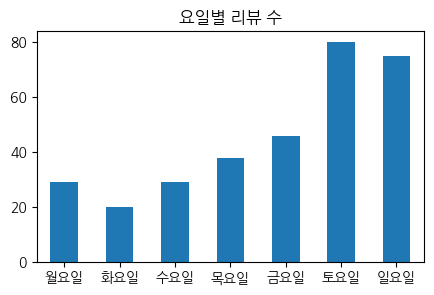

In [13]:
fig, ax = plt.subplots(figsize=(5, 3))
weekdays = ["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]
weekday_data[weekdays].plot(ax=ax, kind="bar")

# title 설정
ax.set(title="요일별 리뷰 수", xlabel="")
# x축 요소 라벨 설정
for label in ax.get_xticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment('center')

plt.show()

## 2. 워드 클라우드

* 워드 클라우드는 눈에 띄는 키워드를 찾는 목적으로 사용했다. 
* 제외한 내용
    * 가게 이름이나 리뷰 분석에 도움이 되지 않는 일반적인 단어들 제외
    * 빈도수가 1개인 경우 제외

In [8]:
# 커스텀한 워드 클라우드
def draw_wordcloud_by_period(data, title):
    wordcloud = WordCloudTool(
        data=data, 
        exclude_words=["뷔페", "음식", "호텔", "신라", "파크뷰"]
    )

    wordcloud.draw(
        group="all", 
        titles=[f"{title} 용언(N) 워드 클라우드", f"{title} 체언(V) 워드 클라우드"],
        crange=(1, np.inf),
        min_length=2
    )

    return wordcloud.word_dict

In [9]:
data_path = "data/naver_review_tokenizing.csv"
tk_data = pd.read_csv(data_path, parse_dates=["date"], encoding="CP949")
tk_data.head(5)

,reviewer,date,weekday,review,N,V
0,shooooooo,2024-06-07,금요일,종류도 알차게 많고 다 맛있어요,종류,알차다 많다 맛있다
1,쥴리08,2024-05-23,목요일,커피랑 브런치크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피...,커피 브런치 크림 파스타 파스타 신라 커피,먹다 불다 나오다 맛있다
2,illiiilillil,2024-05-19,일요일,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,직원 친절 음식 맛 대한민국 호텔 부페 넘버원 뭐 조금 입장 융통 거 일류 구색 거,이다 좋다 아쉽다 약하다
3,DEAN KIL,2024-05-04,토요일,비싸지만 좋은곳,곳,비싸다 좋다
4,이진욱쨩,2024-04-21,일요일,항상 친절하시고 음식도맛있네요,친절 음식,맛있다


### 1) 전체

* 용언에서는 크게 음식, 서비스, 환경(주차, 분위기 등)으로 나눠지는 것으로 보인다
* 체언에서는 대부분 긍정이나, "달다", "식다", "비싸다" 등의 소수의 의견이 보인다. 

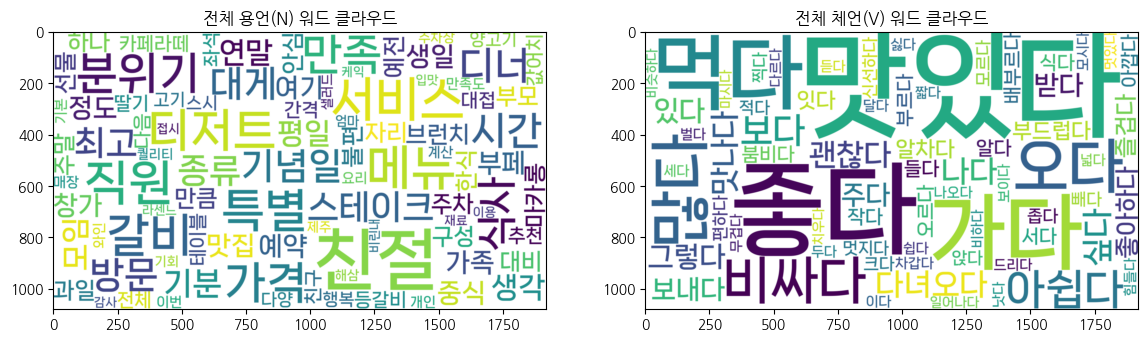

In [10]:
wordcloud_total = draw_wordcloud_by_period(tk_data, title="전체")

In [22]:
# 실제 리뷰 검색해보기
search = search_review(tk_data, column="V", keyword="아쉽다")
for review in search["review"]:
    print(review)
    print("="*100)

직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금씩 일찍 입장 시켜주시는 융통성도 좋아요 쬐끔 아쉬운건 의외로 과일류 구색이 약하다는 거
평일 브런치 다녀왔는데 금요일이라 그런지 사람 엄청 많네요 대게 쯔란양념등갈비 피칸파이 딸기 특히 맛있던 것 같습니다 좌석 간격이 좀 좁고 옆 좌석 이야기가 너무 잘 들리는 것은 좀 아쉬웠어요
몇번 갈때 마다 늘 테이블이 협소한게 가장 아쉽지만 22일 생일이라 디너로 갔는데 서비스도 메뉴도 대만족 입니다
베스트 메뉴는 양갈비였습니당 안심스테이크 회 대게도 진짜 배터지게 먹었네요 그리고 딤섬류도 은근 별미에요 막판에 배불러서 디저트 많이 못먹은게 아쉽네요 신라 더파크뷰 최고
직원분들 친절하고 음식들 다 맛있어요 특히 샐러드 파트에서는 피조개 된장무침 샐러드 엄청 맛있었네요 디저트도 두말할거 없이 훌륭 최근 가격 인상되서 아쉽지만 워낙 물가가 요동치니 어쩔수 없죠
분위기는 좋지만 가격대비 음식 구성이 그리 대단하진 않아요 몇번째 갓는데 좀 아쉽습니다 12월부터는 가격이 인상된다고 들엇는데 솔직히 인상된 가격에는 이용 안할거같아요 맛도 좀 아쉬웠어요
연말송년모임으로 다녀왔는데 얼마못먹어서 아쉽지만 친절해서조았어요 수프와 스테이크 쌀국수 맛납니다
태어나서 첨 가보는 신라호텔 추억가득 사랑가득 비싸구 맛나구 근데 입이 짧아서 많이 먹지못해 아쉬웠던 식사
양갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이 촉박해요 2시간이라서 대화 나누면서 충분히 먹기에는 부족하고 30분 정도 더 있으면 좋겠어요
중식류가 유명한걸 뒤늦게 알아서 아쉬웠던 파크뷰 서비스가 친절하고 육류가 다양합니다
종류 굉장히 다양하고 이름이 낯선 음식들도 많아요 한번쯤 방문할만 하지만 가격대비는 모르겠어요 사람이 많아서 정신 없는게 아쉬웠네요
맛있어요 한식 레스토랑이 따로 있어서 그런지 한식라인은 아예 없어서 좀 아쉬웠지만 종종 가볼만합니다아
파크뷰는 개인적으로 서울보다 제주를 훨씬 좋아하는 데 서울도 음

### 2) 연도별

* 22년과 23년의 의견은 대부분 동일한 것으로 보인다.
* 겹치는 게 많아서 차이를 확인할 수 없다.

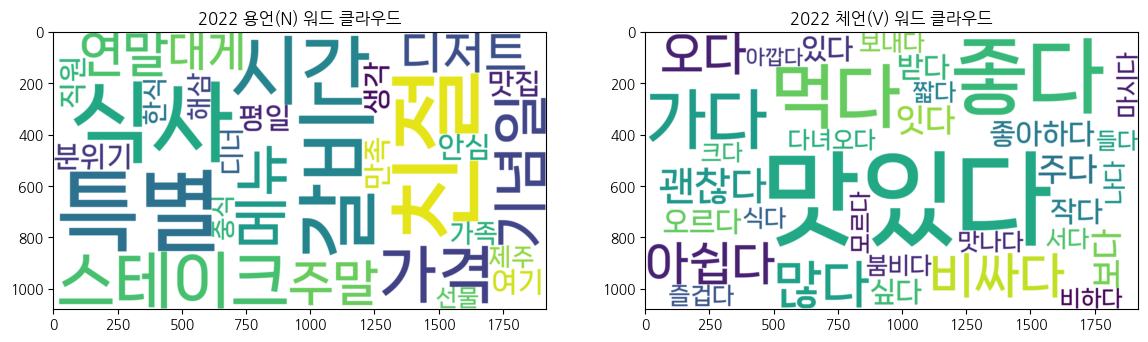

In [11]:
by_year = tk_data[tk_data["date"].dt.year==2022]
wordcloud22 = draw_wordcloud_by_period(by_year, title="2022")

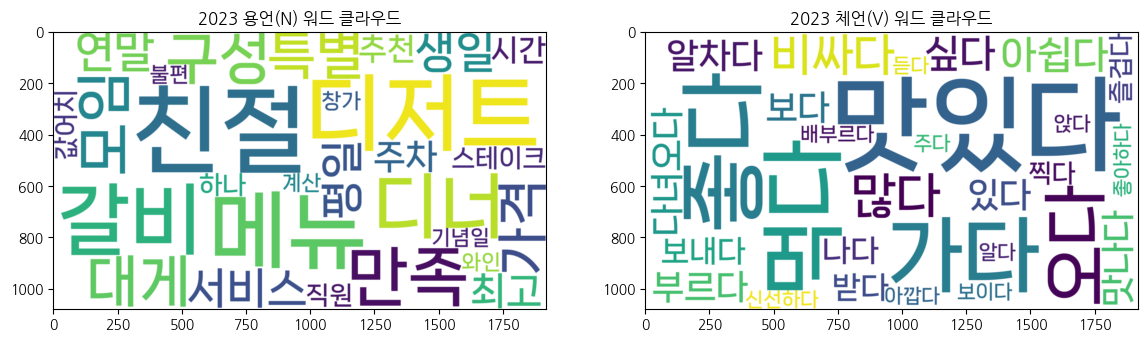

In [12]:
by_year = tk_data[tk_data["date"].dt.year==2023]
wordcloud23 = draw_wordcloud_by_period(by_year, title="2023")

### 3) 키워드 차이 비교

* 시기별 리뷰 분석에서 22년에 가장 리뷰가 활발한 것으로 보였지만, 표현은 23년이 더 구체적인 것으로 보인다.
* 리뷰 반응 또한 22년보다 23년이 더 좋은 것 같다

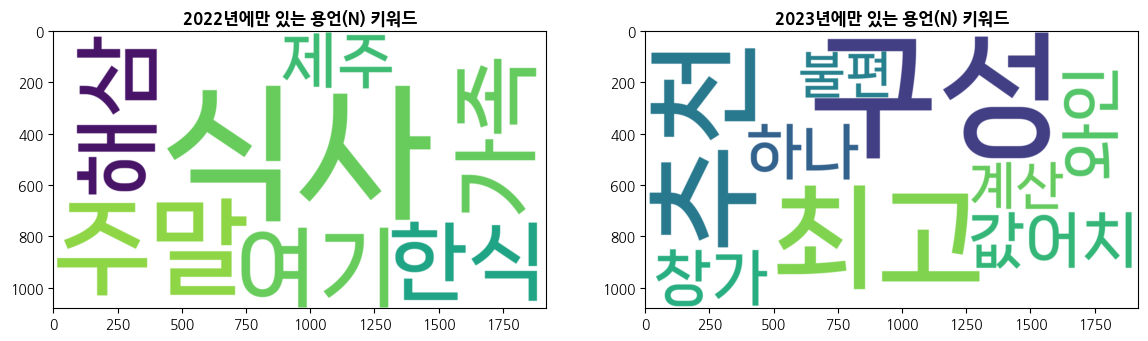

In [13]:
compareN = compare_wordcloud(
    wordcloud22,
    wordcloud23,
    column="N",
    titles = ["2022", "2023"]
)

In [14]:
compareN

{0: {'식사': 7, '주말': 3, '여기': 2, '가족': 2, '해삼': 2, '한식': 2, '제주': 2},
 1: {'구성': 3,
  '최고': 2,
  '추천': 2,
  '값어치': 2,
  '하나': 2,
  '창가': 2,
  '와인': 2,
  '계산': 2,
  '불편': 2}}

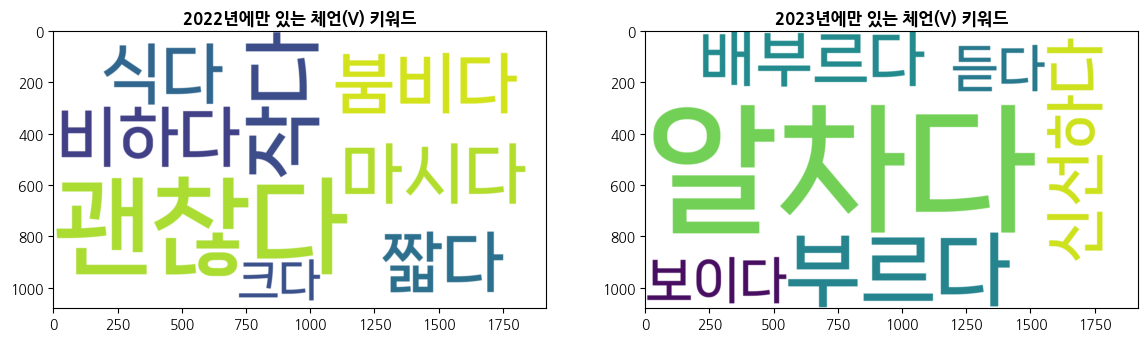

In [15]:
compareV = compare_wordcloud(
    wordcloud22,
    wordcloud23,
    column="V",
    titles = ["2022", "2023"]
)

In [17]:
compareV

{0: {'식다': 2,
  '작다': 3,
  '붐비다': 2,
  '마시다': 2,
  '괜찮다': 6,
  '짧다': 2,
  '비하다': 2,
  '크다': 2},
 1: {'알차다': 4, '부르다': 4, '배부르다': 2, '신선하다': 2, '보이다': 2, '듣다': 2}}

In [19]:
# 실제 리뷰 검색해보기
search = search_review(tk_data, column="V", keyword="듣다")
for review in search["review"]:
    print(review)

분위기는 좋지만 가격대비 음식 구성이 그리 대단하진 않아요 몇번째 갓는데 좀 아쉽습니다 12월부터는 가격이 인상된다고 들엇는데 솔직히 인상된 가격에는 이용 안할거같아요 맛도 좀 아쉬웠어요
서울3대뷔페라 하는 이유를 알겠음 친절하고 동선이 편하고 대접받는 느낌이 강하게 들었음 앞으로도 중요한 행사가 있다면 신라호텔 더파크뷰에서 하고 싶을 정도임


## 📋 결론

* 알 수 있는 정보
    * 시기별 리뷰 수를 "리뷰 활동량"이라고 정의할 때, 리뷰 활동량은 22년까지 계속 증가하다가 23년에 줄어든 것으로 나타남.
    * 평일보다는 주말에 리뷰 수가 더 많았으며, 주로 기념일, 생일과 같이 특별한 날에 방문한 것으로 보인다.
    * 워드클라우드 분석 결과, 특정 음식에 대한 긍부정이 있었을 것으로 파악되며, 맛있었지만 비싼 가격에 대해 만족도가 떨어지는 것으로 보인다.
    * 각 연도의 차집합 키워드들만 추출해봤을 때, 22년에는 주로 가족과 함께했지만, 23년에는 더 다양한 유형의 방문객이었을 걸로 예상된다. 
* 아쉬운 점
    * 용언과 체언을 분리해서 확인하다보니 용언에 대한 긍/부정을 정확하게 판단하기 어려웠다.
    * 워드 클라우드만으로는 정확한 긍/부정에 대한 분석이 어려웠다.